# Regression Tree (Hitters Data)

회귀 문제를 해결하는 Decision Tree의 경우 terminal node의 종속변수(y)의 평균을 예측값으로 반환하게 된다.    
예측 값의 종류는 terminal node 개수와 일치한다.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

%matplotlib inline

## 1. Load Datasets

In [2]:
hitters_data = pd.read_csv('./data/Hitters.csv', index_col=0)
hitters_data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [3]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

## 2. PreProcessing

In [4]:
# Null 값 제거
hitters_data.dropna(how='any', inplace=True)
hitters_data.shape

(263, 20)

In [5]:
# Salary(y값) log변환
hitters_data['Salary'] = np.log(hitters_data['Salary'])
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


## 3. Decision Tree

Decision Tree는 계산의 복잡성 대비 높은 예측 성능을 내는 것으로 알려져 있으며, 변수 단위로 설명력을 가진다는 것이 장점이다. 하지만, 결정경계(decision boundary)가 데이터 축에 수직이기 때문에 특정 데이터에서만 잘 작동하는 편이다. 이러한 문제를 해결하는 것이 Random Forest이다.

In [6]:
# Decision Tree 테스트
# 두 가지의 변수 만으로 Decision Tree 학습
X = hitters_data[['Years', 'Hits']]
y = hitters_data[['Salary']]

regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
regr_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

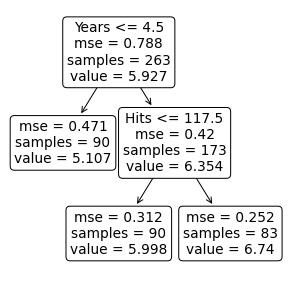

In [7]:
# 트리 구조 시각화
plt.figure(figsize=(5, 5))
tree.plot_tree(regr_tree, 
               feature_names=X.columns, 
               rounded=True)
plt.show()

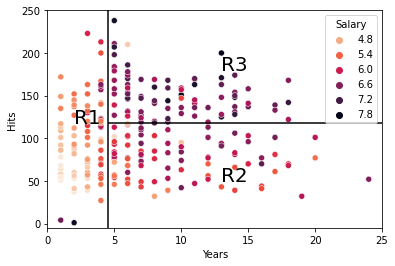

In [8]:
# 데이터 분기 시각화

# 산포도 그리기
palette = sns.color_palette("rocket_r", as_cmap=True)
g = sns.scatterplot(x='Years', y='Hits', hue='Salary', data=hitters_data, palette=palette)
g.set(xlim=(0, 25), ylim=(-5, 250))

# 트리 분기 라인 시각화
plt.vlines(4.5,  ymin=-5, ymax=250, colors='black')
plt.hlines(117.5, xmin=4.5, xmax=25, colors='black')
plt.annotate('R1', xy=(2, 117.5), fontsize=20)
plt.annotate('R2', xy=(13, 50), fontsize=20)
plt.annotate('R3', xy=(13, 180), fontsize=20)
plt.show()

----

**TIP)** *Decision Tree의 분기*

Decision Tree는 순도(Homogeneity)가 증가, 불순도(Impurity) 혹은 불확실성(Uncertainty)가 최대한 감소하는 방향으로 학습을 진행한다.    
이때, 분기에 사용하는 지표는 분류에서는 엔트로피(Entropy), 지니계수(Gini Index) 두 가지와 회귀에서는 MSE(Mean Squared Error)가 대표적이다.
    
- 범주형
1. 엔트로피 (Entropy)    
$Entropy(A) = -\sum_{k=1}^{m}P_{k}\log_{2}(P_{k})$   
     

2. 지니계수 (Gini Index)     
$G.I(A) = \sum^{d}_{i=1}(R_{i}(1 - \sum^{m}_{k=1}p^{2}_{ik}))$

분류 문제의 지표 두 가지 모두 0.5(범주가 반반씩 섞여 있는 형태)에서 불순도가 최대가 되며 하나의 범주 만으로 분할 되었을 때 불순도가 최소가 된다. 아래 그림의 오분류오차(misclassification error)의 경우 미분이 불가능한 지표이므로 잘 사용하지 않는다.

<img src='./image/entropy_gi.png' width=400 height=400>

- 수치형
1. MSE (Mean Squared Error)   
$MSE = \frac{1}{n}\sum^{n}_{i=1}(y_{i}-\hat{y_{i}})^{2}$    

회귀의 경우 선형 회귀와 마찬가지로 MSE가 최소가 되는 방향으로 모델 학습이 이루어진다. 

----

In [47]:
# 모든 변수를 활용한 Decision Tree
X = pd.get_dummies(hitters_data)    # 더미회
X = X[X.columns.difference(['Salary'])]    # X변수 추출
y = hitters_data['Salary']    # y변수 추출

print(X.shape)
print(y.shape)

(263, 22)
(263,)


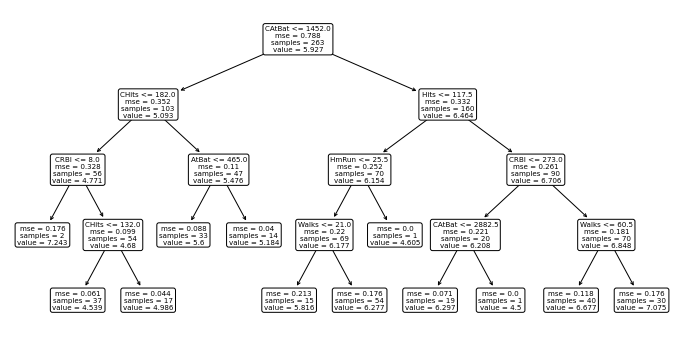

In [48]:
# Decision tree 학습
regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
regr_tree.fit(X, y)

# 트리 구조 시각화
plt.figure(figsize=(12, 6))
tree.plot_tree(regr_tree, 
               feature_names=X.columns, 
               rounded=True)
plt.show()

leaf nodes: 8 ( 0.238 )


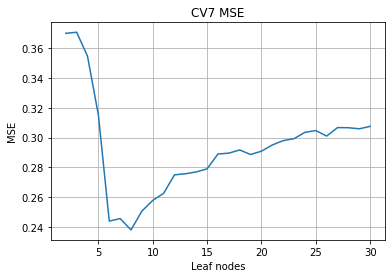

In [50]:
# 최적의 leaf nodes 계산

size_range = range(2, 31)
mse_scores = []

for s in size_range:
    regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=s, random_state=123)
    
    # K-fold 교차검증
    # Negative Mean Squared Error 평가 지표로 사용
    # 7-fold cross validation
    mse = -cross_val_score(regr_tree, X, y, cv=9, scoring='neg_mean_squared_error')
    
    mse_scores.append(np.mean(mse))

opt_leaf = mse_scores.index(min(mse_scores)) + 2
print('leaf nodes:', opt_leaf, '(', round(min(mse_scores), 3), ')')
plt.plot(size_range, mse_scores)
plt.title('CV7 MSE')
plt.xlabel('Leaf nodes')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

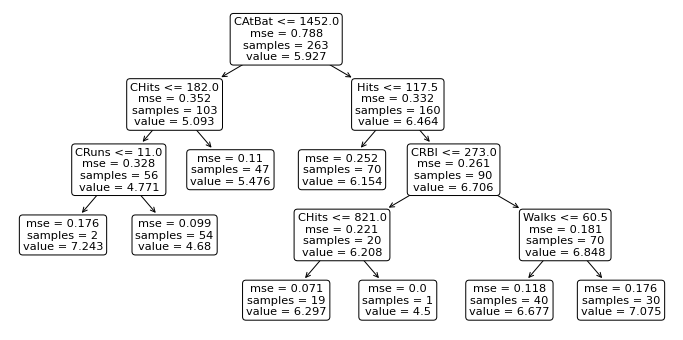

In [51]:
# 최적의 leaf nodes로 Decision tree 학습
regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=opt_leaf)
regr_tree.fit(X, y)

# 트리 구조 시각화
plt.figure(figsize=(12, 6))
tree.plot_tree(regr_tree, 
               feature_names=X.columns, 
               rounded=True)
plt.show()

In [69]:
# 중요한 상위 10개의 Feature 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': regr_tree.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)[:10]

,feature,importance
2,CAtBat,0.704212
3,CHits,0.094202
6,CRuns,0.075745
11,Hits,0.071524
5,CRBI,0.038106
20,Walks,0.016211
13,League_A,0.000000
19,Runs,0.000000
18,RBI,0.000000
17,PutOuts,0.000000


In [82]:
# 최적의 leaf_nodes와 중요 Feature를 활용하여 최적의 Decision Tree 학습

# 중요한 Feature만 사용하여 X, y값 선정
selected_ft = feature_importance[feature_importance['importance'] > 0]['feature'].values
X = hitters_data[selected_ft]
y = hitters_data['Salary']

# 최적의 leaf_nodes로 Decision Tree 학습
regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=opt_leaf)
regr_tree.fit(X, y)

# 임의의 X_test 생성
f_min = np.min(X[selected_ft])
f_max = np.max(X[selected_ft])
X_test = pd.concat([pd.Series(np.random.randint(f_min[i], f_max[i], size=10)) 
                    for i in range(len(selected_ft))], axis=1)
X_test.columns = selected_ft
print(X_test, end='\n\n')

# 예측
y_pred = regr_tree.predict(X_test)
print(y_pred)

   CAtBat  CHits  CRBI  CRuns  Hits  Walks
0    8151   2732  1655   1026   164      3
1   11507    611   899    290   230     22
2   10436   3718  1117    322   162     51
3   10044   1513   496    365   131     96
4     369    235   283   1553   159    101
5    9499    896  1243   1680   165     39
6    5810   2273  1121   1933   100     75
7   11112    595   209    352   172      4
8   12888   2410  1584    174    11     57
9    6514   1058   553   2058   221     41

[6.6773443  6.6773443  6.6773443  7.07516471 5.47611307 6.6773443
 6.15418249 6.29742222 6.15418249 6.6773443 ]


<br/>

**결론)**   

*최적의 모델 도출을 위한 leaf nodes의 선택은 8개이며, 이때 주요한 Feature는 CAtBat, CHits, CRBI, CRuns, Hits, Walks 이다.*

<br/>

# Classification Tree (Heart Data)

## 1. Load Datasets

In [86]:
heart_data = pd.read_csv('./data/Heart.csv', index_col=0)
heart_data.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [87]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


## 2. PreProcessing

범주형 변수의 경우 Dummies화 하는 것이 보통이나, Decision Tree의 경우 Label Encoding을 적용하여도 경우에 따라 괜찮은 결과가 나올 수 있다. 그러므로 이번에는 label encoding 방식과 dummies 방식을 비교 본다.

In [131]:
# Null 값 데이터 제거
heart_data = heart_data.dropna()
heart_data.shape

(297, 14)

In [132]:
# X, y갑 분할
X = heart_data[heart_data.columns.difference(['AHD'])]
y = heart_data['AHD']

# 학습, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(237, 13) (237,)
(60, 13) (60,)


In [133]:
# label encoding
le = preprocessing.LabelEncoder()
X_train_lb = X_train.copy()
X_test_lb = X_test.copy()

X_train_lb['ChestPain'] = le.fit_transform(X_train_lb['ChestPain'])
X_train_lb['Thal'] = le.fit_transform(X_train_lb['Thal'])
X_test_lb['ChestPain'] = le.fit_transform(X_test_lb['ChestPain'])
X_test_lb['Thal'] = le.fit_transform(X_test_lb['Thal'])

X_train_lb.head(3)

,Age,Ca,ChestPain,Chol,ExAng,Fbs,MaxHR,Oldpeak,RestBP,RestECG,Sex,Slope,Thal
54,44,0.0,2,219,0,0,188,0.0,130,2,1,1,1
268,59,1.0,1,218,0,1,134,2.2,126,0,1,2,0
97,59,1.0,0,239,1,0,142,1.2,110,2,1,2,2


In [134]:
# dummies
X_train_dm = X_train.copy()
X_test_dm = X_test.copy()

X_train_dm = pd.get_dummies(X_train_dm)
X_test_dm = pd.get_dummies(X_test_dm)

X_train_dm.head(3)

,Age,Ca,Chol,ExAng,Fbs,MaxHR,Oldpeak,RestBP,RestECG,Sex,Slope,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
54,44,0.0,219,0,0,188,0.0,130,2,1,1,0,0,1,0,0,1,0
268,59,1.0,218,0,1,134,2.2,126,0,1,2,0,1,0,0,1,0,0
97,59,1.0,239,1,0,142,1.2,110,2,1,2,1,0,0,0,0,0,1


In [135]:
# y데이터 가공
y_train = y_train.apply(lambda x: 1 if x.strip() == 'Yes' else 0)
y_test = y_test.apply(lambda x: 1 if x.strip() == 'Yes' else 0)
y_train

54     0
268    1
97     1
266    1
236    1
      ..
108    1
84     1
18     0
234    0
100    0
Name: AHD, Length: 237, dtype: int64

## 3. Decision Tree

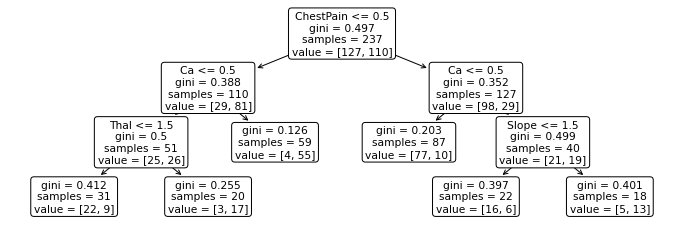

In [152]:
# label encoding 방식 X변수의 Decision Tree 학습 
regr_tree_lb = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=7)
regr_tree_lb.fit(X_train_lb, y_train)

# 트리 구조 시각화
plt.figure(figsize=(12, 4))
tree.plot_tree(regr_tree_lb, 
               feature_names=X_train_lb.columns, 
               rounded=True)
plt.show()

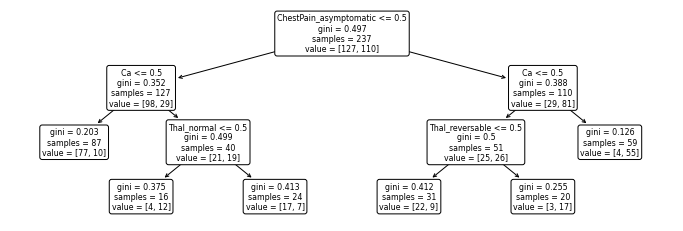

In [171]:
# dummies 방식 X변수의 Decision Tree 학습 
regr_tree_dm = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=7)
regr_tree_dm.fit(X_train_dm, y_train)

# 트리 구조 시각화
plt.figure(figsize=(12, 4))
tree.plot_tree(regr_tree_dm, 
               feature_names=X_train_dm.columns, 
               rounded=True)
plt.show()

In [170]:
# 두 모델의 정확도 비교
print('label encoding result: ', round(regr_tree_lb.score(X_test_lb, y_test), 4))
print('dummies result: ', round(regr_tree_dm.score(X_test_dm, y_test), 4))

label encoding result:  0.8833
dummies result:  0.8833


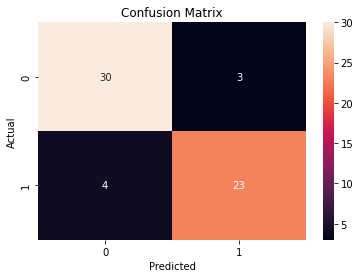


[Confusion Report]

               precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.88      0.85      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [168]:
def get_confusion_mt(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    confusion_mt = pd.crosstab(_y_test.values.ravel(), y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
    return confusion_mt

def get_confusion_report(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    return classification_report(_y_test, y_pred)

# confusion matrix 산출 
confusion_mt = get_confusion_mt(regr_tree_lb, X_test_lb, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(regr_tree_lb, X_test_lb, y_test))

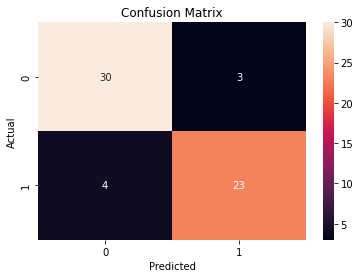


[Confusion Report]

               precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.88      0.85      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [169]:
def get_confusion_mt(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    confusion_mt = pd.crosstab(_y_test.values.ravel(), y_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
    return confusion_mt

def get_confusion_report(model, _X_test, _y_test):
    y_pred = model.predict(_X_test)
    return classification_report(_y_test, y_pred)

# confusion matrix 산출 
confusion_mt = get_confusion_mt(regr_tree_dm, X_test_dm, y_test)

# confusion matrix 시각화
fig = sns.heatmap(confusion_mt, annot=True, fmt='d')
fig.set_title('Confusion Matrix')
plt.show()

# 여러 측정지표 확인
print('\n[Confusion Report]\n\n', get_confusion_report(regr_tree_dm, X_test_dm, y_test))

<br/>

**결론)**   

Label Encoding 방식과 Dummies 방식을 비교한 결과 Tree의 모양은 상이하지만, 그 결과는 차이가 없다.

<br/>